In [15]:
lf_values = [1, 2, 3, 4, 5]

# リストを DataFrame に変換して 'lf' カラムを持たせる
df = pd.DataFrame(lf_values, columns=['lf'])

In [1]:
import sys
sys.path.append('..')
from Constants import Constants

import heartpy as hp
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

masanori
masanori さんの flow フェーズのデータを分析します。
計測時間は310.59秒です

Finished in 0.101750 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


191
             lf
0    518.065569
1    515.624315
2    512.868786
3    510.255372
4    507.562662
..          ...
186  403.147641
187  403.372034
188  403.048501
189  414.167767
190  414.332982

[191 rows x 1 columns]


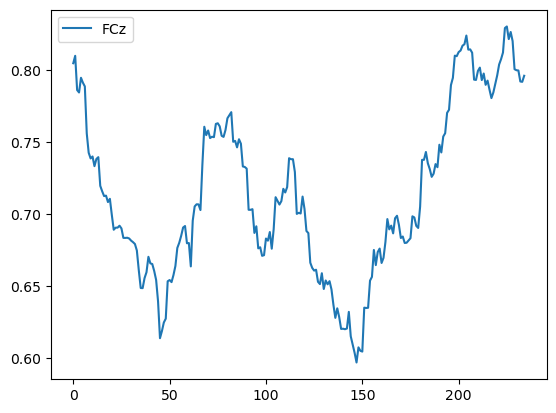

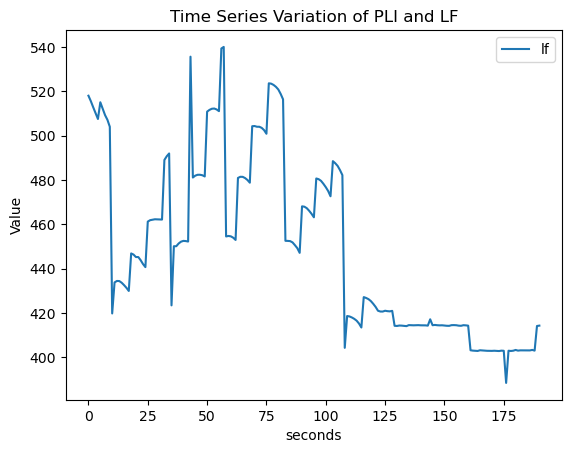

In [47]:
for i, subject_name in enumerate(Constants.subject_name_list):

    if subject_name != "masanori":
        continue
    print(subject_name)
    
    for j, phase_name in enumerate(Constants.phase_name_list):

        # -----------------------------------------

        if phase_name != "flow":
            continue

        # practiceフェーズが使われなくなった弊害
        phase_index = j
        if phase_name != "rest":
            phase_index += 1


        pli_path = f"/Users/miyakooti/repositories/arai_MATLAB_program/csv/{i}_{subject_name}/PLIdata/PLI_{phase_index}_{subject_name}_{phase_name}.csv"
        pli_df = pd.read_csv(f"{pli_path}")

        pli_df = pli_df[["FCz"]]

        pli_df.plot()
        plt.title("time series variation of PLI")
        plt.xlabel("seconds")
        plt.ylabel("PLI")
        plt.legend()


        # -----------------------------------------

        
        hrdata = hp.get_data(f"{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/ECG_{subject_name}_{phase_name}.csv", delim = ",", column_name = "ECG")
        save_path = f'{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/{subject_name}_HRV.csv'
        
        # 心電図が逆向きになってしまっていたので、特例措置
        if subject_name == "kim":
            hrdata = hrdata*(-1)
        
        # debug-print -----------------------------------------------------------------
        
        print(f"{subject_name} さんの {phase_name} フェーズのデータを分析します。")
        sec = len(hrdata)/500
        print(f"計測時間は{sec}秒です")
        
        # / ---------------------------------------------------------------------------
        
        # 心拍変動パラメータの計算
        working_data, measures = hp.process(hrdata[int(60*Constants.fs):], Constants.fs, report_time=True, calc_freq=True)


        current_time = 120 * 500
        min_lf = 999999
        min_hf = 999999
        slice_value_s = 1


        lf_time_series = []



        while current_time < len(hrdata):

            hrdata_slice = hrdata[0: current_time]
            working_data, measures = hp.process(hrdata_slice, Constants.fs, report_time=False, calc_freq=True)
            
            lf = measures["lf"]
            lf_time_series.append(lf)

            current_time += slice_value_s * 500



        df = pd.DataFrame(lf_time_series, columns=['lf'])

        print(len(df))
        print(df)

        # 平均と標準偏差を計算
        mean = df['lf'].mean()
        std_dev = df['lf'].std()

        # 3シグマ法で外れ値を平均値に置き換え
        df['lf'] = np.where((df['lf'] < mean - 3 * std_dev) | (df['lf'] > mean + 3 * std_dev), mean, df['lf'])



        df.plot()
        plt.title("time series variation of LF")
        plt.xlabel("seconds")
        plt.ylabel("PLI")
        plt.show()
        




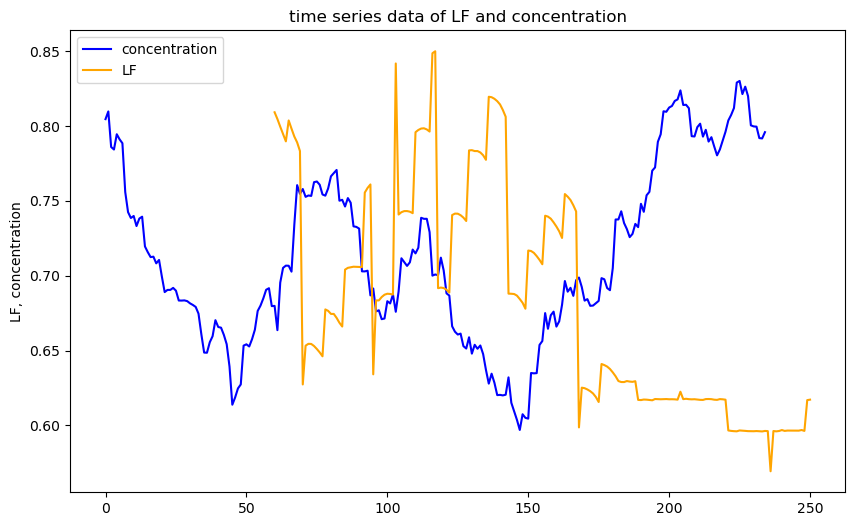

In [56]:
zeros_df = pd.DataFrame({'lf': [None] * 60})

df_60_shift = pd.concat([zeros_df, df], ignore_index=True)

# グラフの作成
plt.figure(figsize=(10, 6))

# pli_dfのプロット
plt.plot(pli_df['FCz'], label='concentration', color='blue')

# dfのプロット
plt.plot(df_60_shift['lf']/df["lf"].max() - 0.15, label='LF', color='orange')

# グラフの装飾
plt.xlabel('')  # x軸ラベル
plt.ylabel('LF, concentration')  # y軸ラベル
plt.title('time series data of LF and concentration')  # タイトル
plt.legend()  # 凡例を表示

# グラフを表示
plt.show()

In [41]:
print(df)
print(len(lf_time_series))
print(max(lf_time_series))
lf_time_series.remove(max(lf_time_series))
print(max(lf_time_series))
lf_time_series.remove(max(lf_time_series))
lf_time_series.remove(max(lf_time_series))

lf_time_series.remove(max(lf_time_series))
print(max(lf_time_series))





             lf
0    473.621887
1    474.731526
2    478.293805
3    480.098320
4    482.206295
..          ...
194  646.119868
195  646.482303
196  645.947993
197  646.801181
198  646.558583

[199 rows x 1 columns]
199
1550584723510.9792
1877571.0710113088
657.757828112376


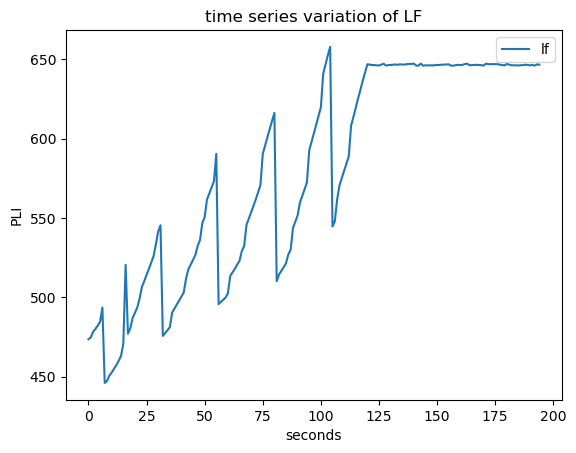

In [42]:
df = pd.DataFrame(lf_time_series, columns=['lf'])


df.plot()
plt.title("time series variation of LF")
plt.xlabel("seconds")
plt.ylabel("PLI")
plt.show()